In [1]:
import pandas as pd
import altair as alt

In [3]:
ls /data2/elilouis/sublimationofsnow/tilden_precip_data

KP22_274-365-daily-precip.dat  KP23_001-177-daily-precip.dat
KP22_274-365.PRECIP1           KP23_001-177.PRECIP1


In [7]:
fn_2022 = "/data2/elilouis/sublimationofsnow/tilden_precip_data/KP22_274-365-daily-precip.dat"
fn_2023 = "/data2/elilouis/sublimationofsnow/tilden_precip_data/KP23_001-177-daily-precip.dat"

In [34]:
df = pd.concat([
    pd.read_csv(fn_2022, delim_whitespace=True),
    pd.read_csv(fn_2023, delim_whitespace=True)
])
# create timestamps from strings
df['date'] = pd.to_datetime(df['date'])
# calculate accumulated precip
df['acc_prec'] = df['avg'].cumsum()

In [39]:
base = alt.Chart(df).encode(alt.X("date:T")).properties(height = 200, width = 400)
base.mark_line().encode(
    alt.Y("acc_prec:Q").title("Cumulative precipitation (mm SWE)")
) & base.mark_bar().encode(
    alt.Y("avg:Q").title("Daily precipitation (mm SWE)")
)

alt.VConcatChart(...)

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

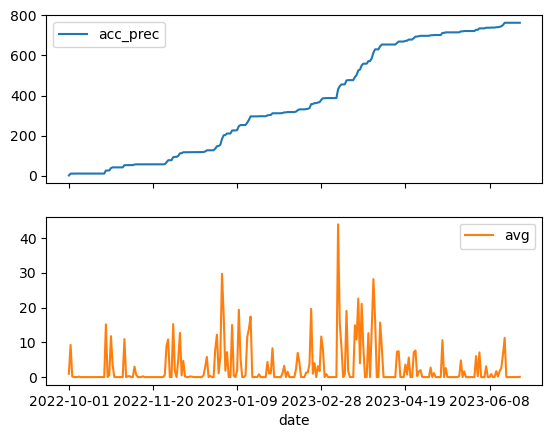

In [15]:

df.set_index("date")[['acc_prec', 'avg', ]].plot(subplots=True)